# Assignment 2

## Xinyao Mo  xm92

###  1. Feedforward: Building a ReLU neural network

####  1. Draw a network with:

<img style="float:center;" src="A2Capture.JPG" width = "80%">

#### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations)

$h_1=max(0, X_1W_{11}+X_2W_{21}+b_{11})$

$h_2=max(0, X_1W_{12}+X_2W_{22}+b_{12})$

$h_3=max(0, X_1W_{13}+X_2W_{23}+b_{13})$

$h_4=max(0, X_1W_{14}+X_2W_{24}+b_{14})$

$Y_{in}=V_1h_1+V_2h_2+V_3h_3+V_4h_4+b_2$

$\hat Y=\frac{1}{1+e^{-(V_1h_1+V_2h_2+V_3h_3+V_4h_4+b_2)}}=\frac{1}{1+e^{-(V_1max(0, X_1W_{11}+X_2W_{21}+b_{11})+V_2max(0, X_1W_{12}+X_2W_{22}+b_{12})+V_3max(0, X_1W_{13}+X_2W_{23}+b_{13})+V_3max(0,X_1W_{14}+X_2W_{24}+b_{14})+b_2)}}$

#### 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [13]:
import numpy as np
def ff_nn__ReLu(W, X, b1, V, b2):
    H = np.maximum(np.dot(X, W) + b1, 0)
    Yin = np.dot(H, V) + b2
    Y = 1/(1 + np.exp(-Yin))
    return Y

#### 4. Suppose you have the following set of weight matrices:...what are the class probabilities associated with the forward pass of each sample?

In [16]:
X = np.array([[1, -1], [0, -1], [0, 1]])
W = np.array([[1, -1, 0,1], [0, 0, 0.5,1]])
b = np.array([0, 0, 1,0])
V = np.array([1, 0, -1,1])
c = np.array([1])


P=ff_nn__ReLu(W, X, b, V,c)

In [17]:
P

array([0.81757448, 0.62245933, 0.62245933])

In [18]:
print('The class probabilities associated with the forward pass of each sample are: \n'+str(P[0])+', '+str(P[1])+' and '+str(P[2])+'.')

The class probabilities associated with the forward pass of each sample are: 
0.8175744761936437, 0.6224593312018546 and 0.6224593312018546.


### 2.Gradient Descent

Consider a simple non-convex function of two variables: 
$$f(x,y)=(3−x^3)+50∗(2y^2 - x)^2$$

#### 1. What are the partial derivatives of f with respect to x and to y?

$\frac{\partial f}{\partial x}=(0-3x^2)+50*2(2y^2-x)(0-1)=-3x^2-100(2y^2-x)=-200y^2-3x^2+100x$
$\frac{\partial f}{\partial y}=100(2y^2-x)(4y)=400y(2y^2-x)=800y^3-400xy$

#### 2. Create a visualization of the contours of this function.

In [19]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

def f(x, y):
    return (3-x**3)+50*(2*y**2-x)**2

# Calculate f(x, y)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

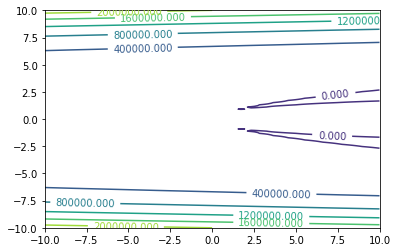

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot1 = ax.contour(X, Y, Z, 6);
ax.clabel(plot1);

#### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [21]:
def partial_x(x, y):
    return -200*y**2-3*x**2+100*x

def partial_y(x, y):
    return 800*y**3-400*x*y

def GradientDescent(x, y, learning_rate, iterations):
    X = [x]
    Y = [y]
    Z = [f(x, y)]
    for i in range(0, iterations):
        x_ = x
        y_ = y
        x = x_-learning_rate*partial_x(x_,y_)
        y = y_-learning_rate*partial_y(x_,y_)
     
        X.append(x)
        Y.append(y)
        Z.append(f(x, y))
    
    return X, Y, Z

In [22]:
def vis(learning_rate):
    
    x, y, z = GradientDescent(0, -1, learning_rate, 50)
    
    X, Y = np.array(x), np.array(y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    
    plt.figure(figsize = (20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(z,'.-')
    plt.title('f(x,y) change with learning rate ' + str(learning_rate))
    plt.ylabel('f(x,y)')
    plt.xlabel('Iteration')

    ax = plt.subplot(1, 2, 2)
    ax.plot(x,y,'o')
    graph = ax.contour(X, Y, Z, 6);
    ax.clabel(graph);
    plt.title('Contours plot with learning rate ' + str(learning_rate))
    plt.show()

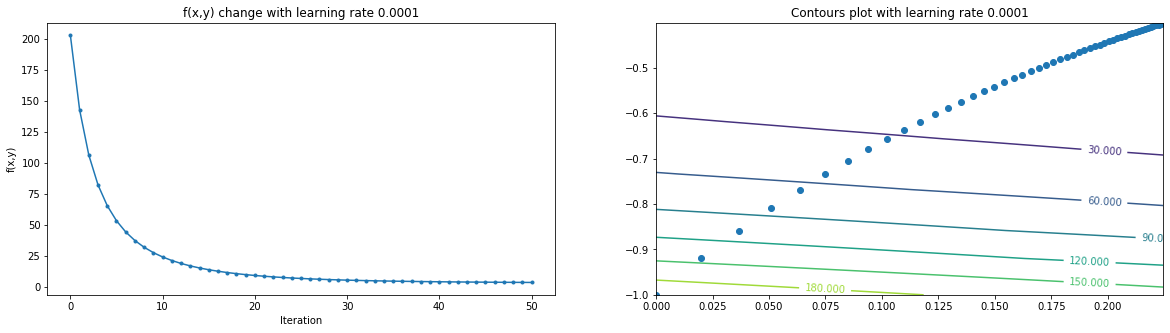

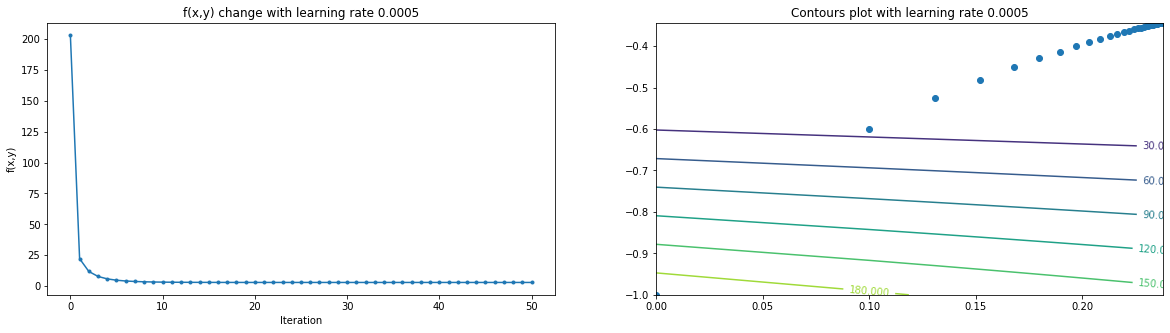

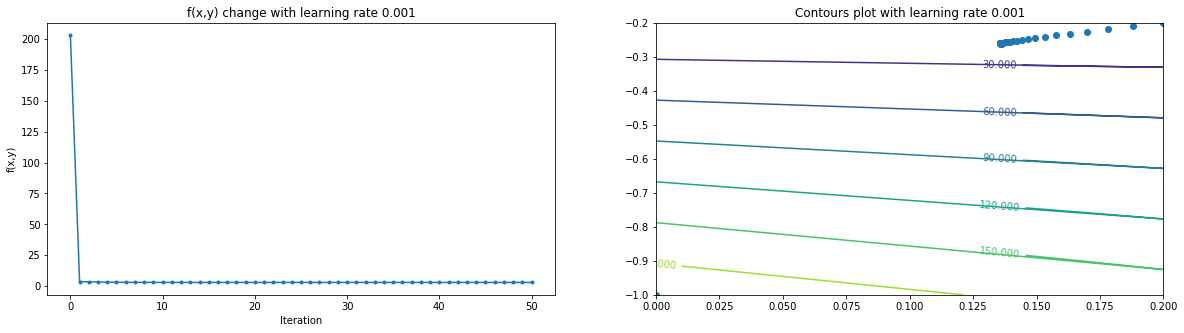

In [23]:
for rate in [0.0001, 0.0005, 0.001]:
    vis(rate)

#### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [24]:
def GradientDescent_Mom(x, y, learning_rate, iterations, alpha, v):
    X = [x]
    Y = [y]
    Z = [f(x, y)]
    
    v_x, v_y = 0, 0
    vx, vy = v, v
    
    for i in range(0, iterations):
        x_ = x
        y_ = y
        v_x += vx
        v_y += vx
        
        vx = alpha*v_x - learning_rate*partial_x(x_,y_)
        vy = alpha*v_x - learning_rate*partial_y(x_,y_)
        
        x = x_ + vx
        y = y_ + vy
     
        X.append(x)
        Y.append(y)
        Z.append(f(x, y))
    
    return X, Y, Z

In [25]:
def vis2(learning_rate, alpha, velocity):
    
    x, y, z = GradientDescent_Mom(0, -1, learning_rate, 50, alpha, velocity)
    
    X, Y = np.array(x), np.array(y)
    X, Y = np.meshgrid(X, Y)
    Z = f(X, Y)
    
    plt.figure(figsize = (20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(z,'.-')
    plt.title('f(x,y) change with learning rate ' + str(learning_rate) + ', alpha ' + str(alpha) + ', velocity ' + str(velocity))
    plt.ylabel('f(x,y)')
    plt.xlabel('Iteration')

    ax = plt.subplot(1, 2, 2)
    ax.plot(x,y,'o')
    graph = ax.contour(X, Y, Z, 6);
    ax.clabel(graph);
    plt.title('Contours plot with learning rate ' + str(learning_rate) + ', alpha ' + str(alpha) + ', velocity ' + str(velocity))
    plt.show()

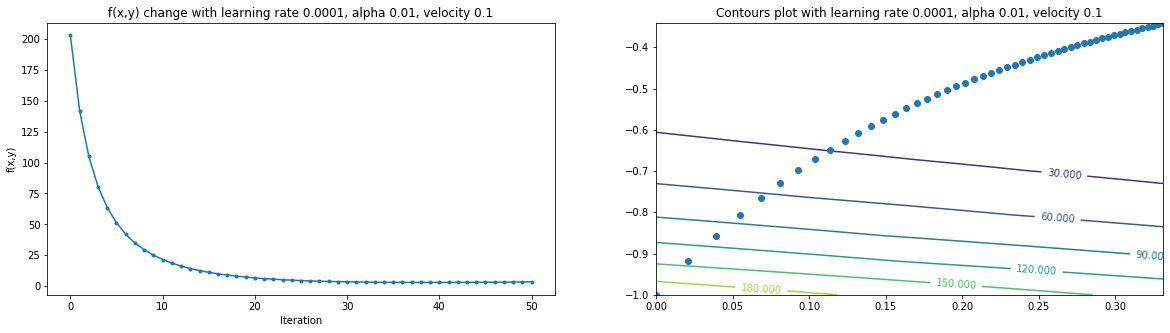

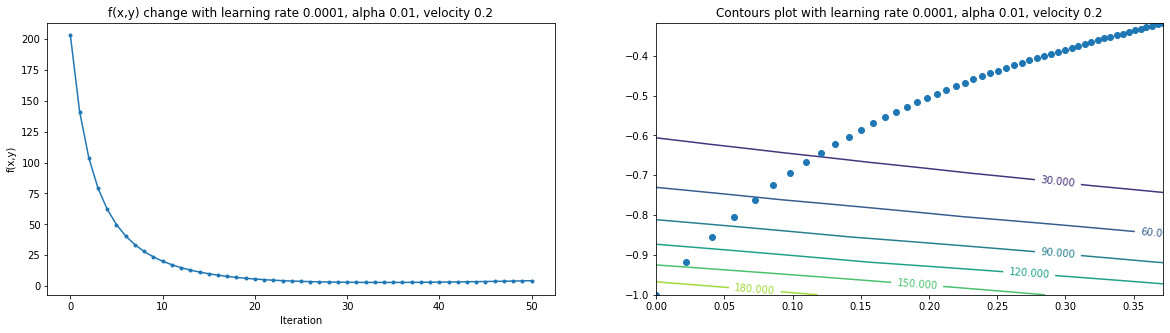

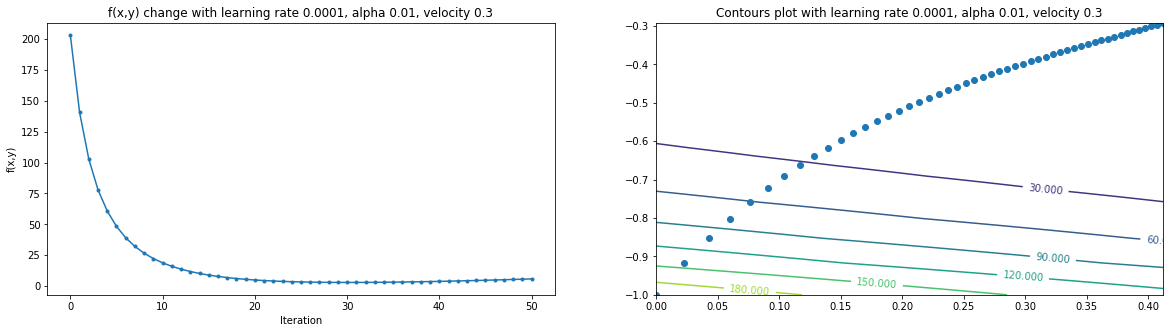

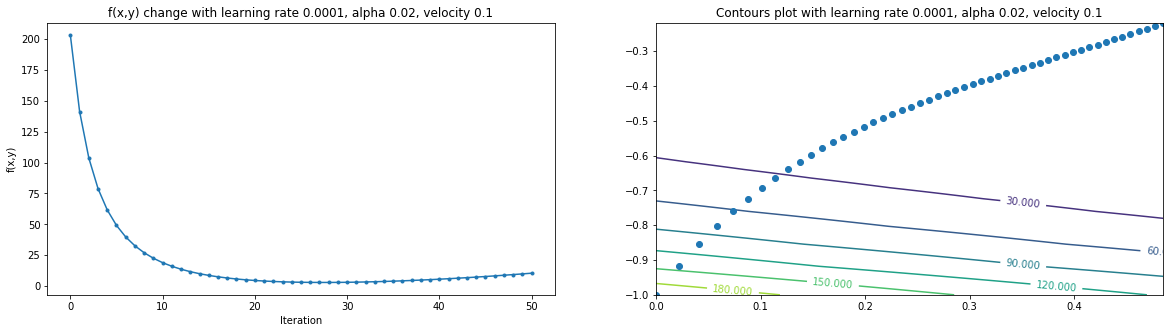

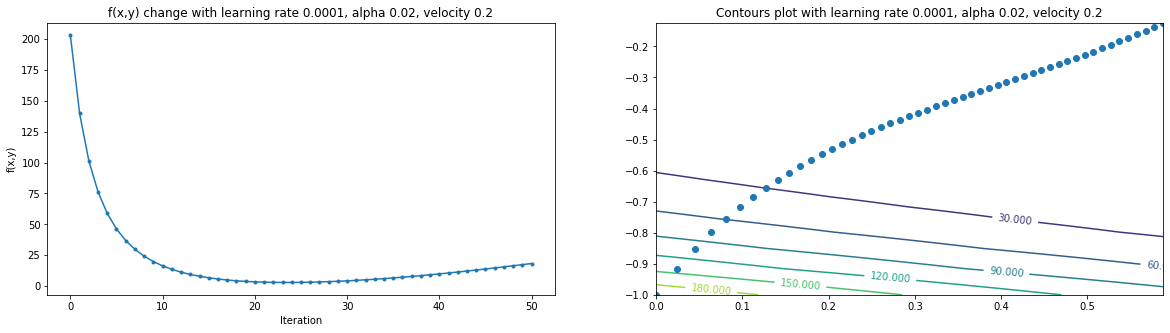

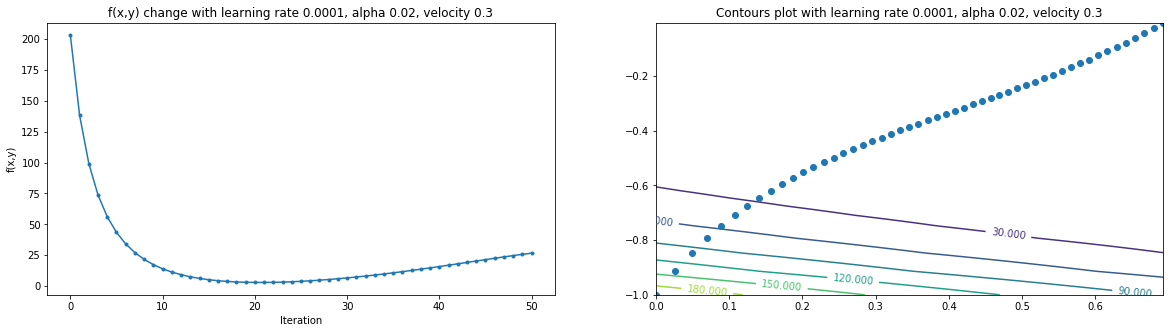

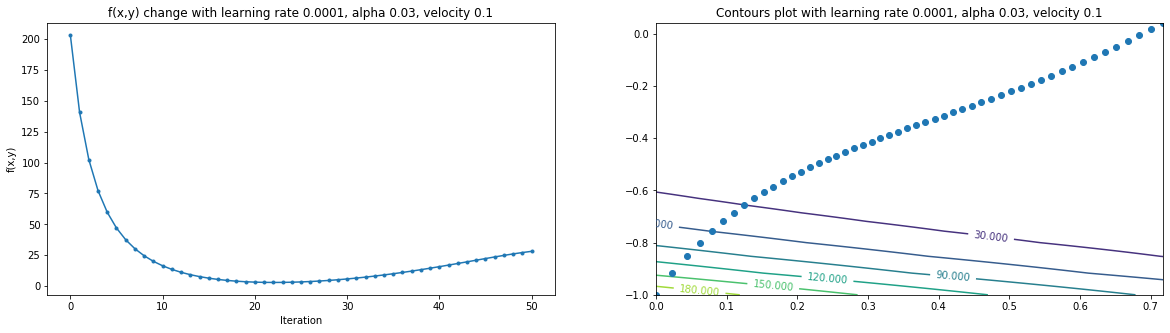

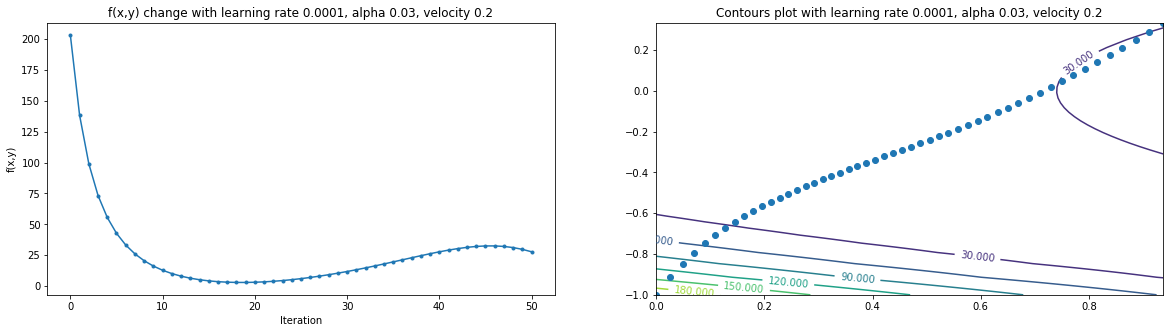

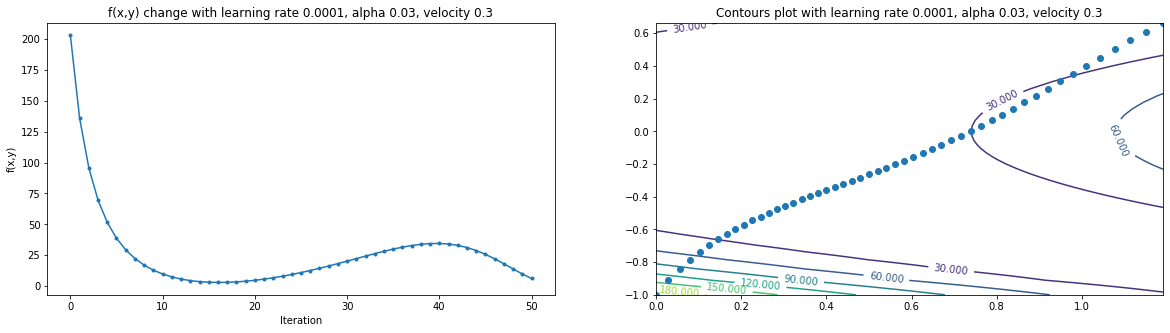

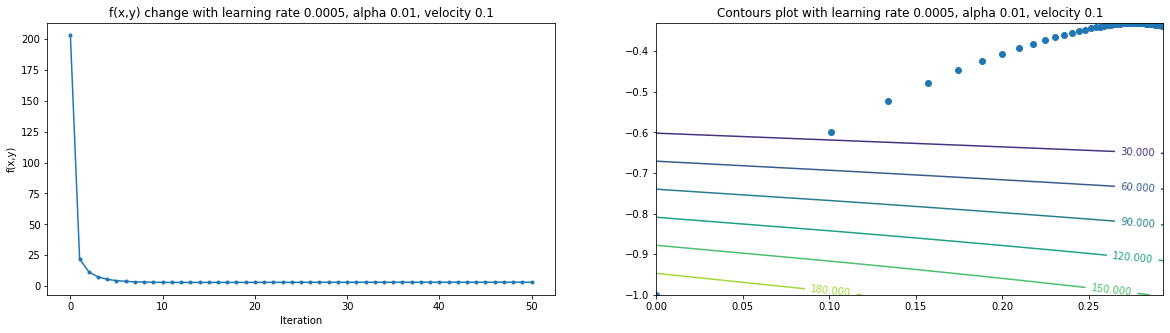

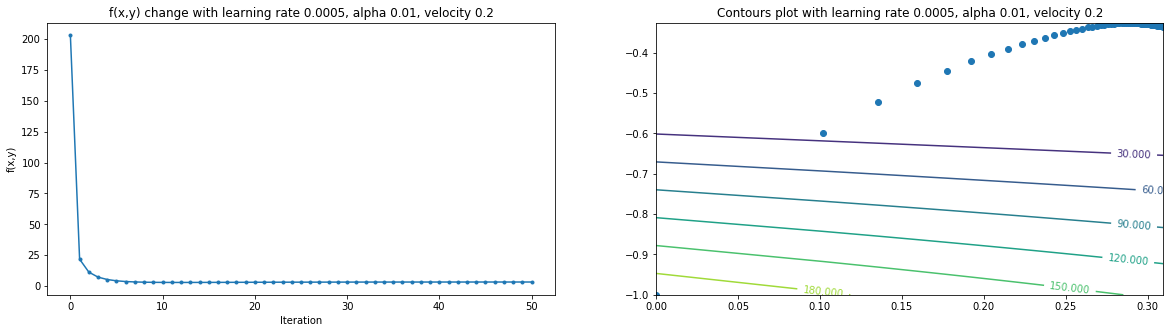

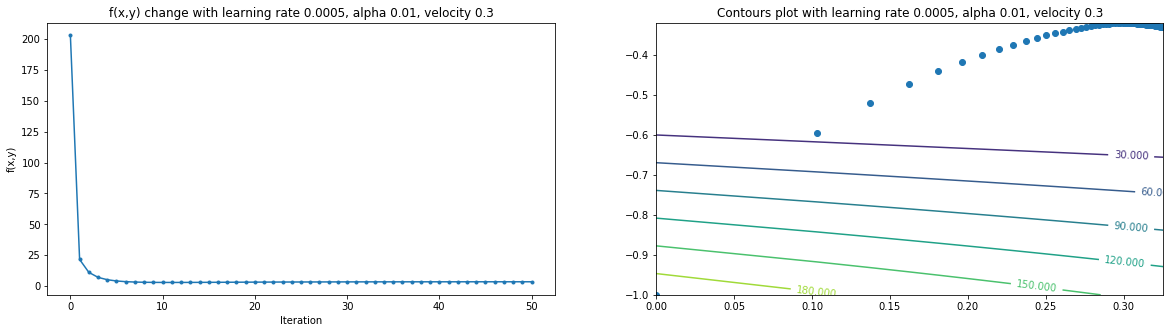

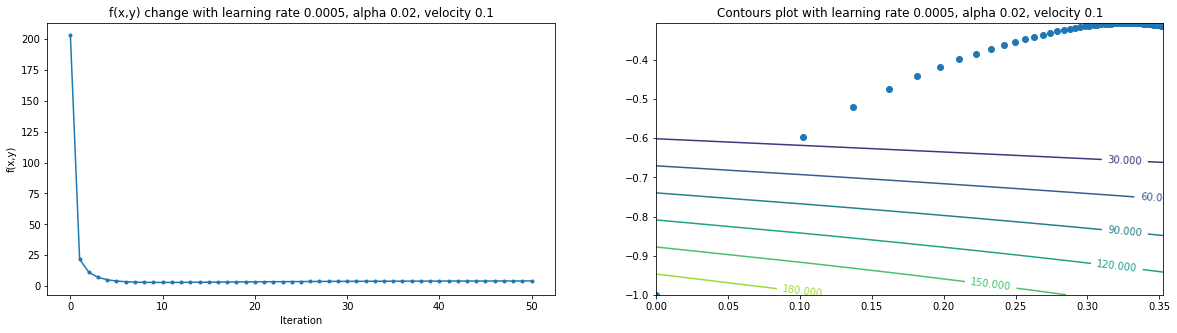

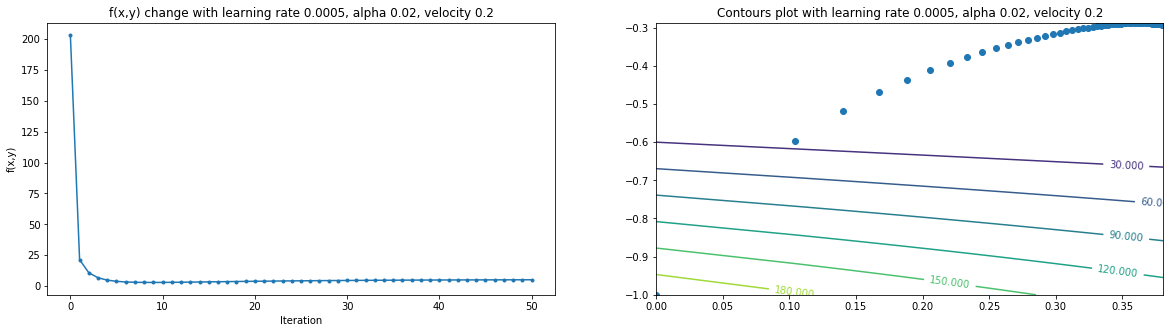

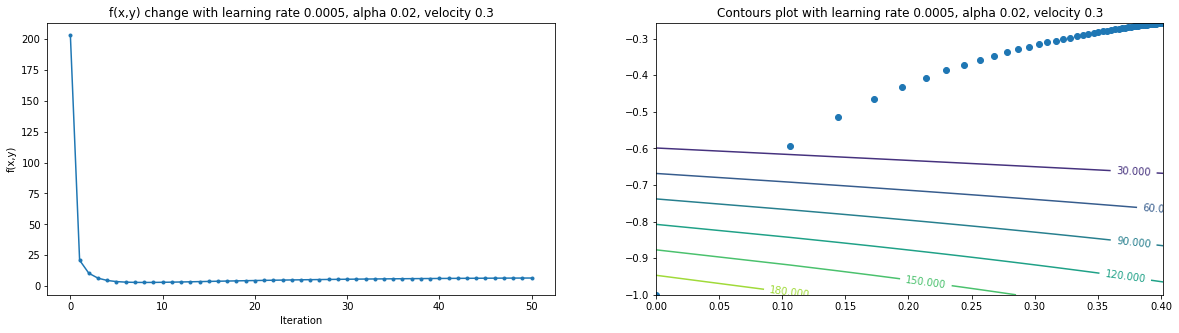

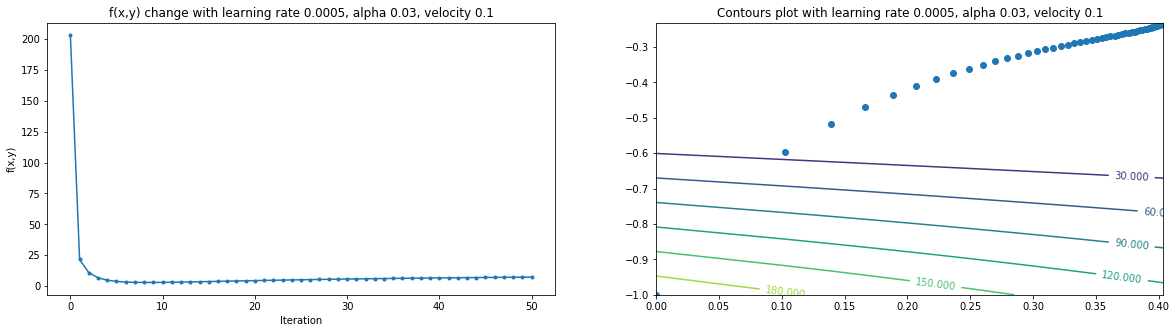

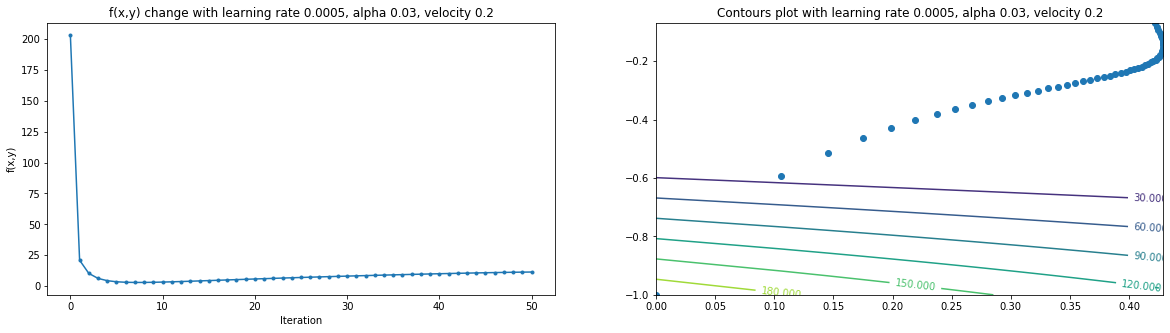

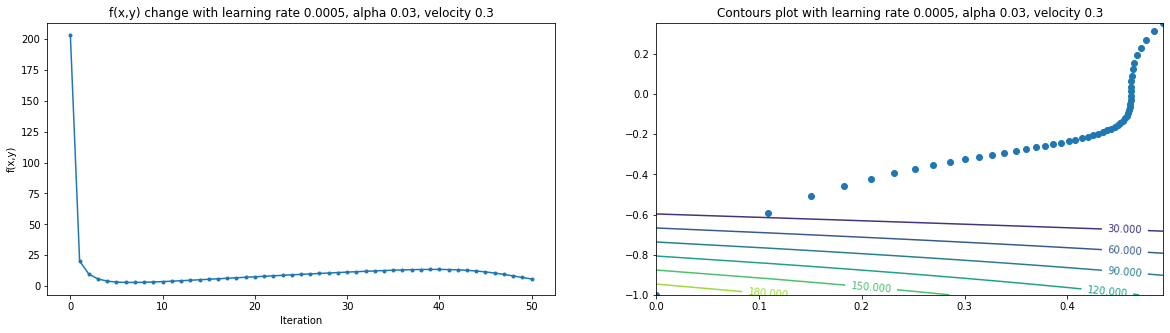

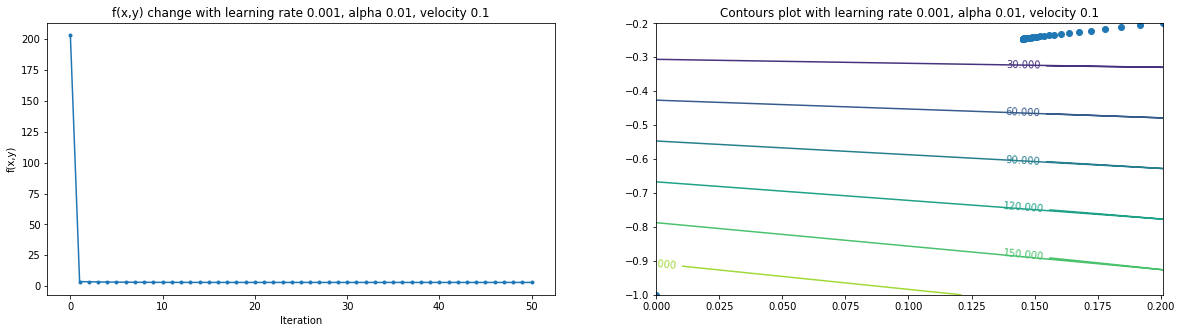

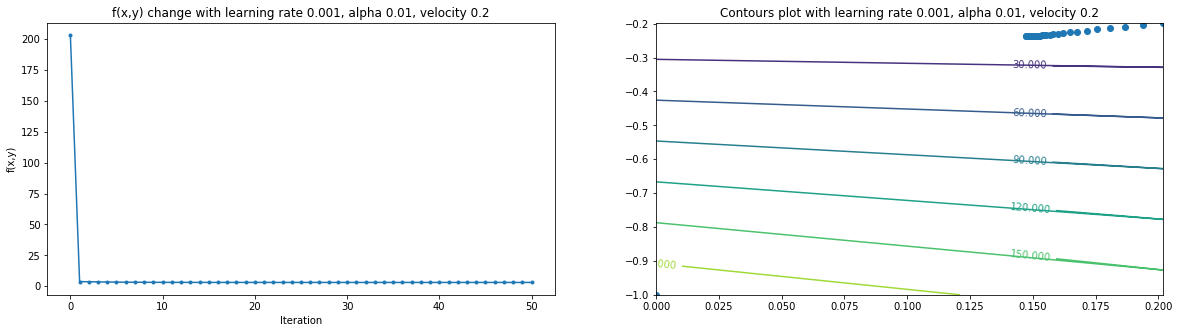

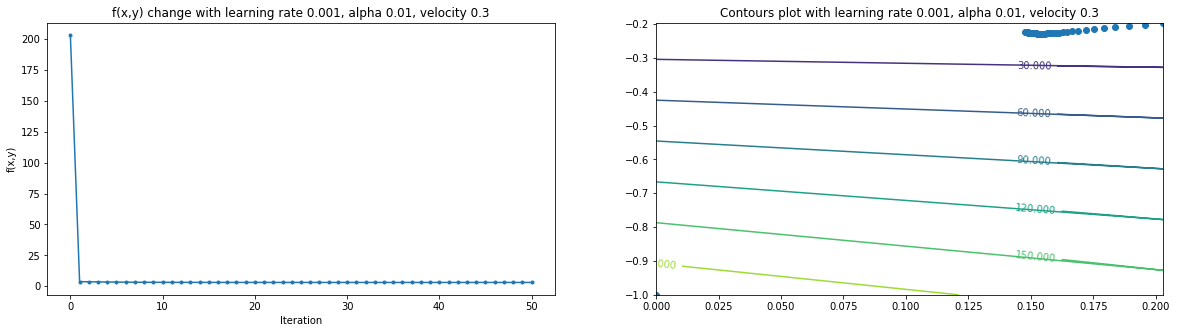

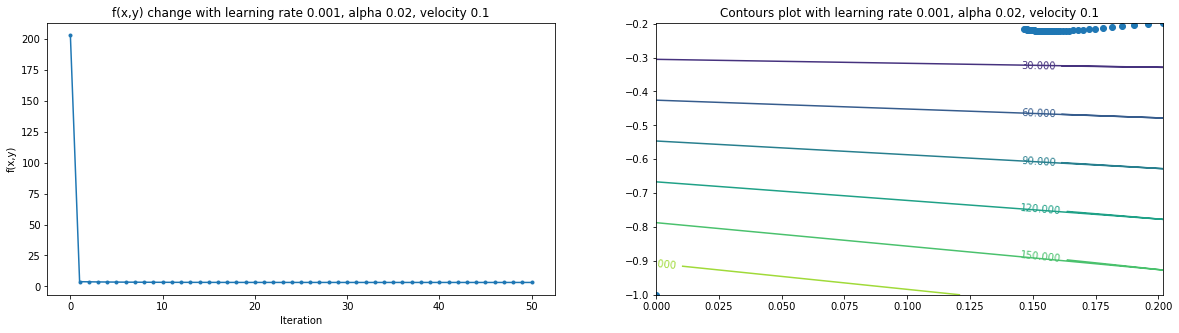

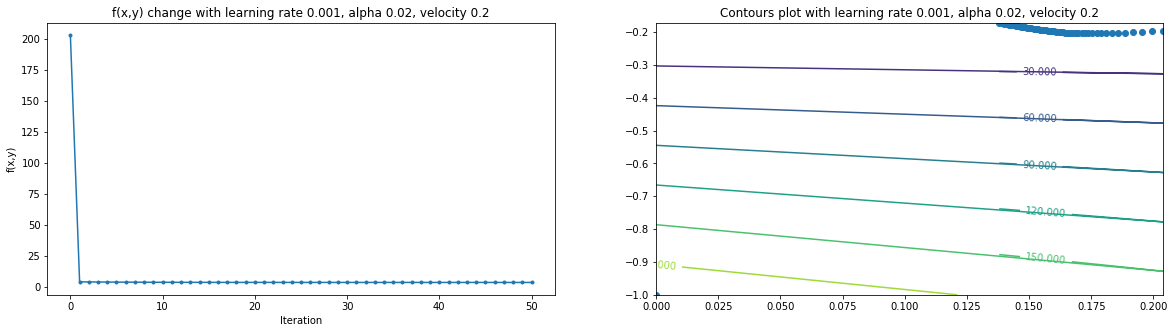

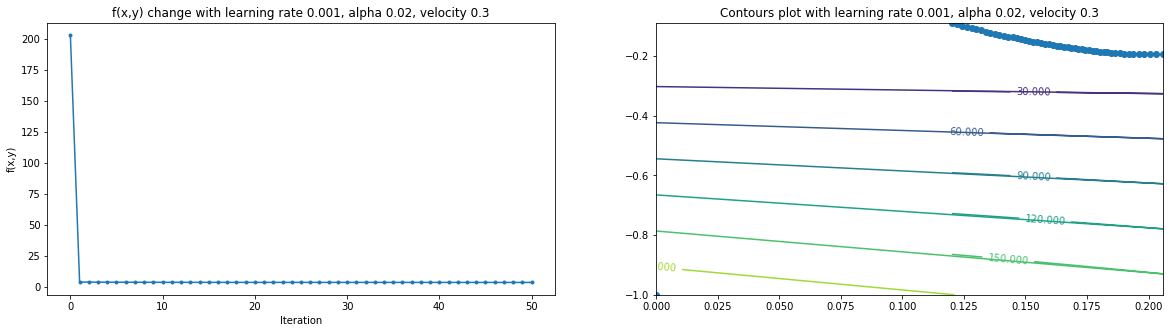

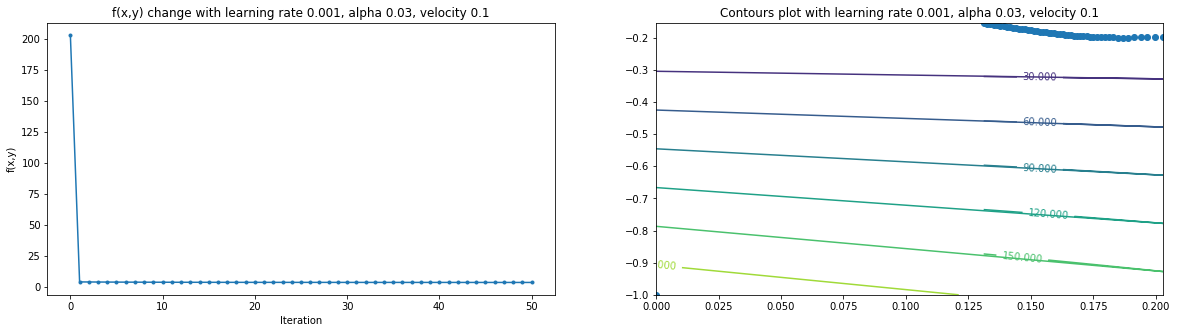

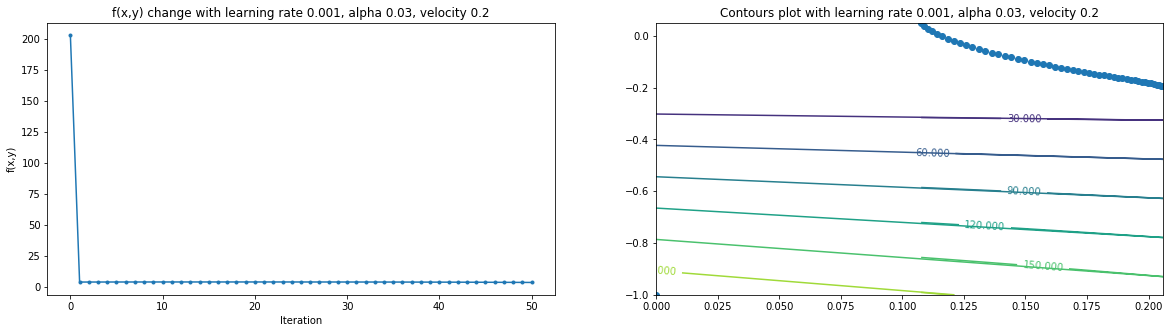

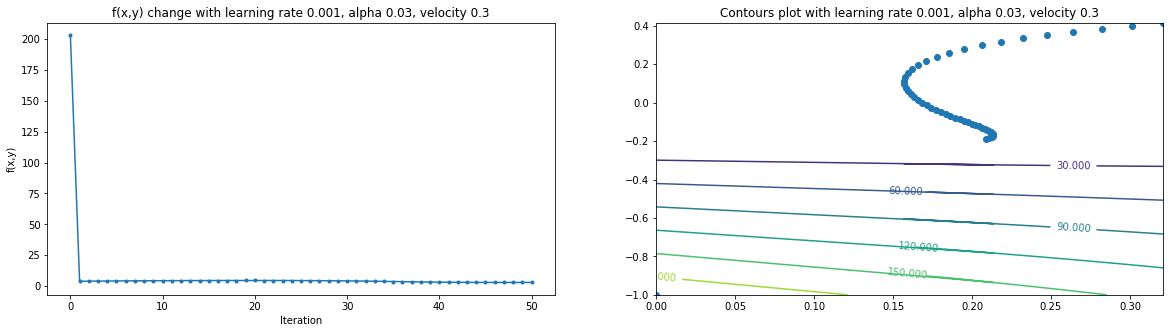

In [26]:
for rate in [0.0001, 0.0005, 0.001]:
    for alpha in [0.01, 0.02, 0.03]:
        for velocity in [0.1, 0.2, 0.3]:
            vis2(rate, alpha, velocity)

### 3.Backprop

#### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

The Loss Function is Binary Entropy Loss : $L=-(y_ilog\hat y_i + (1-y_i)log(1- \hat y_i))$

$\frac{\partial L}{\partial W_{11}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial W_{11}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1x_1$, if $x_1W_{11}+x_2W_{21}+b_1>0$ else $\frac{\partial L}{\partial W_{11}}=0$ 

$\frac{\partial L}{\partial W_{12}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial W_{12}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2x_1$, if $x_1W_{12}+x_2W_{22}+b_2>0$ else $\frac{\partial L}{\partial W_{12}}=0$ 

$\frac{\partial L}{\partial W_{13}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial W_{13}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3x_1$, if $x_1W_{13}+x_2W_{23}+b_3>0$ else $\frac{\partial L}{\partial W_{13}}=0$

$\frac{\partial L}{\partial W_{14}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{4out}} *\frac{\partial h_{4out}}{\partial h_{4in}}*\frac{\partial h_{4in}}{\partial W_{14}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_4x_1$, if $x_1W_{14}+x_2W_{24}+b_4>0$ else $\frac{\partial L}{\partial W_{14}}=0$

$\frac{\partial L}{\partial W_{21}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial W_{21}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1x_2$, if $x_1W_{11}+x_2W_{21}+b_1>0$ else $\frac{\partial L}{\partial W_{21}}=0$

$\frac{\partial L}{\partial W_{22}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial W_{22}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2x_2$, if $x_1W_{12}+x_2W_{22}+b_2>0$ else $\frac{\partial L}{\partial W_{22}}=0$

$\frac{\partial L}{\partial W_{23}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial W_{23}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3x_2$, if $x_1W_{13}+x_2W_{23}+b_3>0$ else $\frac{\partial L}{\partial W_{23}}=0$

$\frac{\partial L}{\partial W_{24}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{4out}} *\frac{\partial h_{4out}}{\partial h_{4in}}*\frac{\partial h_{4in}}{\partial W_{24}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_4x_2$, if $x_1W_{14}+x_2W_{24}+b_4>0$ else $\frac{\partial L}{\partial W_{24}}=0$



$\frac{\partial L}{\partial V_1}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{1}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_1$

$\frac{\partial L}{\partial V_2}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{2}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_2$

$\frac{\partial L}{\partial V_3}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{3}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_3$

$\frac{\partial L}{\partial V_4}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial V_{4}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)h_4$


$\frac{\partial L}{\partial b_2}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial b_2}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)$

$\frac{\partial L}{\partial b_{11}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{1out}} *\frac{\partial h_{1out}}{\partial h_{1in}}*\frac{\partial h_{1in}}{\partial b_{11}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_1$, if $x_1W_{11}+x_2W_{21}+b_{11}>0$ else $\frac{\partial L}{\partial b_{11}}=0$ 

$\frac{\partial L}{\partial b_{12}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{2out}} *\frac{\partial h_{2out}}{\partial h_{2in}}*\frac{\partial h_{2in}}{\partial b_{12}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_2$, if $x_1W_{12}+x_2W_{22}+b_{12}>0$ else $\frac{\partial L}{\partial b_{12}}=0$

$\frac{\partial L}{\partial b_{13}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{3out}} *\frac{\partial h_{3out}}{\partial h_{3in}}*\frac{\partial h_{3in}}{\partial b_{13}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_3$, if $x_1W_{13}+x_2W_{23}+b_{13}>0$ else $\frac{\partial L}{\partial b_{13}}=0$

$\frac{\partial L}{\partial b_{14}}= \frac{\partial L}{\partial \hat Y_{out}}*\frac{\partial \hat Y_{out}}{\partial \hat Y_{in}}*\frac{\partial \hat Y_{in}}{\partial h_{4out}} *\frac{\partial h_{4out}}{\partial h_{4in}}*\frac{\partial h_{4in}}{\partial b_{14}}=-(\frac{y_i}{\hat y_i}-\frac{1-y_i}{1-\hat y_i})\hat y_i(1-\hat y_i)V_4$, if $x_1W_{14}+x_2W_{24}+b_{14}>0$ else $\frac{\partial L}{\partial b_{14}}=0$

#### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [29]:
import numpy as np
# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Loss function
def loss(y, y_hat):
    return -((y/y_hat)-(1-y)/(1-y_hat))

# Hidden layer function
def Hidden(x, W, b1):
    h_in = np.dot(x,W)+b1
    h_out = np.where(h_in>0, h_in, 0)
    return h_out

# Output layer function
def Output(H, V, b2):
    return np.dot(H,V)+b2

# Gradient of the Loss at that location
def grad_f(Weight, x, y):
    
    W=np.reshape(Weight[:8], (2, 4))
    B1=Weight[8:12]
    V=Weight[12:16]
    B2=Weight[16]
    
    H=Hidden(x, W, B1)
    Z=Output(H, V, B2)
    yhat=sigmoid(Z)
    Loss=loss(y, yhat)
    
    # Gradient of the Loss for each W
    V1=np.reshape(V, (1, 4))
    X1=np.reshape(x, (2, 1))
    W_Gra=Loss*yhat*(1-yhat)*np.dot(X1, V1)
    
    # Gradient of the Loss for each V
    V_Gra=Loss*yhat*(1-yhat)*H
    
    # Gradient of the Loss for each b
    b1_Gra=Loss*yhat*(1-yhat)*np.array(V)
    
    # Gradient of the Loss for c
    b2_Gra=Loss*yhat*(1-yhat)

    return W_Gra, V_Gra, b1_Gra, b2_Gra

In [30]:
Weight=[1, -1, 0,1, 0, 0, 0.5,1, 0, 0, 1, 0, 1, 0, -1, 1,1]
X = np.array([1, -1])
Y = 0

W_loss, V_loss, b1_loss, b2_loss = grad_f(Weight, X, Y)
print(W_loss, V_loss, b1_loss, b2_loss)

[[ 0.81757448  0.         -0.81757448  0.81757448]
 [-0.81757448  0.          0.81757448 -0.81757448]] [0.81757448 0.         0.40878724 0.        ] [ 0.81757448  0.         -0.81757448  0.81757448] 0.8175744761936437


#### 3. Generate a synthetic dataset like the XOR pattern (see below)

<module 'matplotlib.pyplot' from 'C:\\Users\\Cosmo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

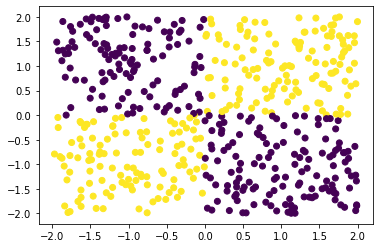

In [28]:
import matplotlib.pyplot as plt
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)
plt

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [31]:
def partial_grad(x, y, W, B1, V, B2):
    H=Hidden(x, W, B1)
    Z=Output(H, V, B2)
    yhat=sigmoid(Z)
    Loss=loss(y, yhat)
    
    # Gradient of the Loss for each W
    V1=np.reshape(V, (1, 4))
    X1=np.reshape(x, (2, 1))
    W_Gra=Loss*yhat*(1-yhat)*np.dot(X1, V1)
    
    # Gradient of the Loss for each V
    V_Gra=Loss*yhat*(1-yhat)*H
    
    # Gradient of the Loss for each b
    b1_Gra=Loss*yhat*(1-yhat)*np.array(V)
    
    # Gradient of the Loss for c
    b2_Gra=Loss*yhat*(1-yhat)

    return W_Gra, V_Gra, b1_Gra, b2_Gra, Loss, yhat

In [63]:
def grad_f2(X, Y, learning_rate, iterations, Weight):
    W=np.reshape(Weight[:8], (2, 4))
    B1=Weight[8:12]
    V=Weight[12:16]
    B2=Weight[16]
    Loss_res = []
    
    for i in range(0, iterations):
        
        # Keep track of sum for each parameters
        sum_loss = 0
        W_sum = np.zeros(shape=(2,4))
        B1_sum = np.zeros(shape=(4))
        V_sum = np.zeros(shape=(4))
        B2_sum = 0
        y_hat = []
        
        # Compute loss and partial derivative for each data point
        for j in range(0, len(Y)):
            
            W_loss, V_loss, B1_loss, B2_loss, Loss, yhat = partial_grad(X[j], Y[j], W, B1, V, B2)
            
            W_sum += W_loss
            V_sum += V_loss
            B2_sum += B2_loss
            B1_sum += B1_loss
            sum_loss += Loss
            y_hat.append(yhat)

        W -= learning_rate*W_sum/len(Y)
        V -= learning_rate*V_sum/len(Y)
        B1 -= learning_rate*B1_sum/len(Y)
        B2 -= learning_rate*B2_sum/len(Y)
        Loss_res.append(sum_loss)
    
    return Loss_res, y_hat

In [64]:
Weight=[1, -1, 0,1, 0, 0, 0.5,1, 0, 0, 1, 0, 1, 0, -1, 1,1]
#X = np.array([1, -1])
#Y = 0
Total_Loss,yhat=grad_f2(x, y, 0.01, 1000, Weight)

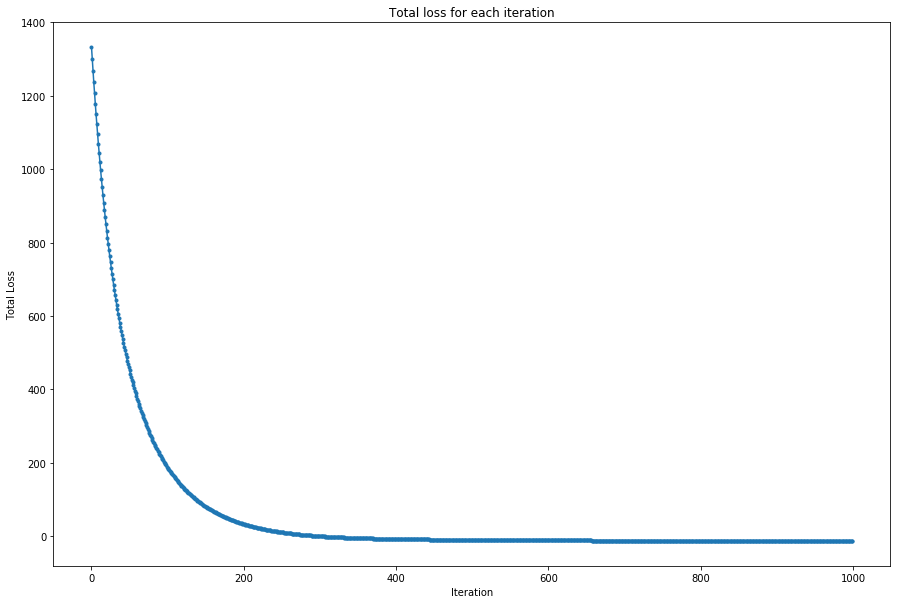

In [38]:
plt.figure(figsize = (15, 10))

plt.plot(Total_Loss, '.-')
plt.title('Total loss for each iteration')
plt.ylabel('Total Loss')
plt.xlabel('Iteration')
plt.show()

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [40]:
def grad_f2_Mom(X, Y, learning_rate, iterations, Weight, alpha):
    W=np.reshape(Weight[:8], (2, 4))
    B1=Weight[8:12]
    V=Weight[12:16]
    B2=Weight[16]
    Loss_res = []
    
    Wv = np.zeros(shape=(2,4))
    B1v = np.zeros(shape=(4))
    Vv = np.zeros(shape=(4))
    B2v = 0
    
    for i in range(0, iterations):
        # Keep track of sum for each parameters
        sum_loss = 0
        W_sum = np.zeros(shape=(2,4))
        B1_sum = np.zeros(shape=(4))
        V_sum = np.zeros(shape=(4))
        B2_sum = 0
        y_hat = []

        for j in range(0, len(Y)):
            W_loss, V_loss, B1_loss, B2_loss, Loss, yhat = partial_grad(X[j], Y[j], W, B1, V, B2)
            W_sum += W_loss
            V_sum += V_loss
            B2_sum += B2_loss
            B1_sum += B1_loss
            sum_loss += Loss
            y_hat.append(yhat)
        
        # Update the velocity
        Wv = alpha*Wv - learning_rate*W_sum/len(Y)
        Vv = alpha*Vv - learning_rate*V_sum/len(Y)
        B1v = alpha*B1v - learning_rate*B1_sum/len(Y)
        B2v = alpha*B2v - learning_rate*B2_sum/len(Y)
        
        # Update the parameters
        W += Wv
        V += Vv
        B1 += B1v
        B2 += B2v
        
        # Append total loss
        Loss_res.append(sum_loss)
    
    return Loss_res, y_hat

In [41]:
Weight=[1, -1, 0,1, 0, 0, 0.5,1, 0, 0, 1, 0, 1, 0, -1, 1,1]

Total_Loss2, y_hat2=grad_f2_Mom(x, y, 0.02, 1000, Weight, 0.2)
Total_Loss3, y_hat3=grad_f2_Mom(x, y, 0.02, 1000, Weight, 0.5)
Total_Loss4, y_hat4=grad_f2_Mom(x, y, 0.02, 1000, Weight, 0.8)

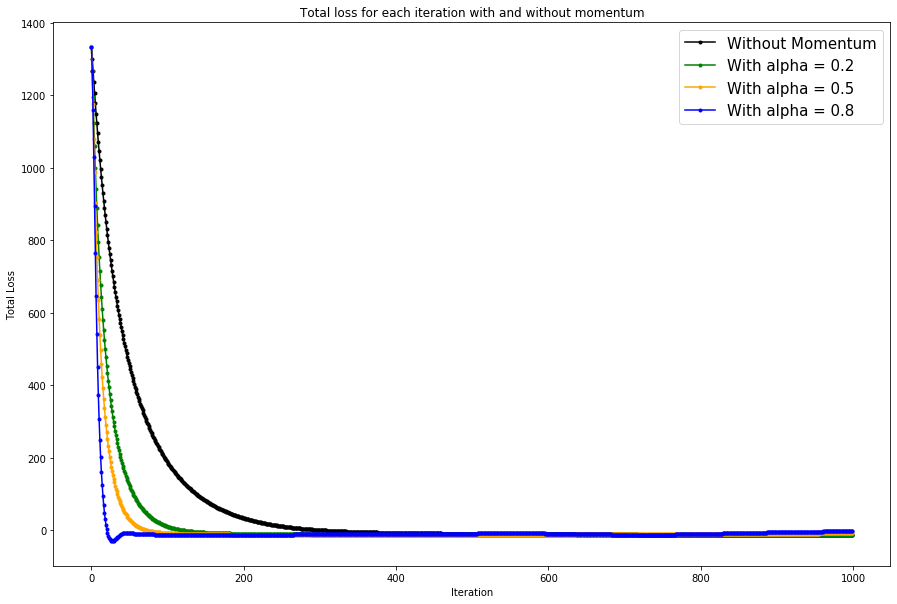

In [45]:
plt.figure(figsize = (15, 10))

plt.plot(Total_Loss, '.-', color = 'black')
plt.plot(Total_Loss2, '.-', color ='green')
plt.plot(Total_Loss3, '.-', color = 'orange')
plt.plot(Total_Loss4, '.-', color = 'blue')

plt.title('Total loss for each iteration with and without momentum')
plt.ylabel('Total Loss')
plt.xlabel('Iteration')
plt.legend(['Without Momentum','With alpha = 0.2','With alpha = 0.5','With alpha = 0.8'], loc=1, prop={'size': 15})
plt.show()

#### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

<module 'matplotlib.pyplot' from 'C:\\Users\\Cosmo\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

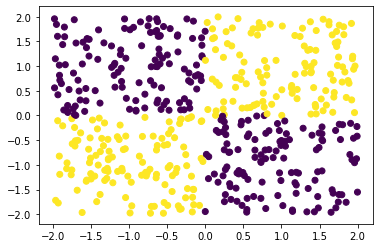

In [50]:
import matplotlib.pyplot as plt
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)
plt


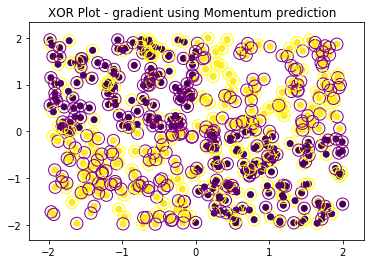

In [70]:
predict_y = ['Yellow']*500

for i in range(len(y_hat4)):
    if y_hat4[i] < 0.5:
        predict_y[i] = 'Purple'
        

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x[:,0], x[:,1], color='', marker='o', edgecolors=predict_y, s=150)
plt.title('XOR Plot - gradient using Momentum prediction  ')
plt.show()

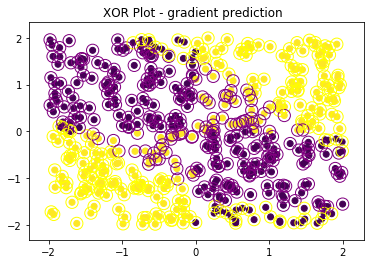

In [67]:
predict_y2 = ['Yellow']*500

for i in range(len(yhat)):
    if yhat[i] < 0.5:
        predict_y2[i] = 'Purple'
        

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x[:,0], x[:,1], color='', marker='o', edgecolors=predict_y2, s=150)
plt.title('XOR Plot - gradient prediction  ')
plt.show()